This project is widely inspired by Pedro Marcelino's "Comprehensive Data Exploration with Python" notebook. The main goal is to get familiar with common practices and methods performed in data science projects as well as the different python libraries used and their multiple applications.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [13]:
df_train = pd.read_csv('data/train.csv')

After reading the data, we want to understand the meaning of each variable and if possible, categorize them. It is also primordial to try to scope the potiential influence each variable can have on the independant variable SalesPrice. 
We can categorize the variable that have a potential influence on SalesPrice in three categories, low, medium, and high. This task is conducted in an excel spreadsheet.

In [14]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Before proceeding further to data analysis, we must know what variable to focus our efforts on, or in other terms, what vriables may have the largest impact on the independant variable. In order to determine what are those variables, we must go through the list of all variables and ask ourselves questions like "if I had to buy a house, how what importance would I give to 'this' variable ?", "Is the eventual value we can harvest from this variable already covered by another one ?" etc.

After this exercise, five variables are retained: GrLivArea, OverallQual, YearBuilt, Neighborhood, and TotalBsmtSF.

In [15]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

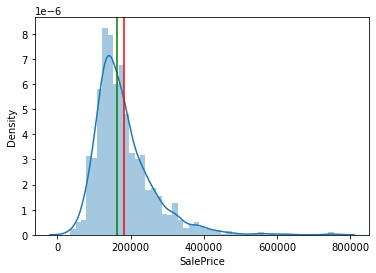

In [16]:
sns.distplot(df_train['SalePrice']);
plt.axvline(df_train['SalePrice'].mean(), color="red")
plt.axvline(df_train['SalePrice'].median(), color="green");

We see that the distribution differ greatly compared to a normal distribution with an important positive skew. The mean and median are both greater than the mode. Distribution is leptokurtic with an important peak. 

In [17]:
print("Kurt: %f" % df_train['SalePrice'].kurt());
print("Skew: %f" % df_train['SalePrice'].skew());

Kurt: 6.536282
Skew: 1.882876


Now that we have a better idea of how SalePrice distribution looks like, we will search for a correlation between SalePrice and the four variables previously selected. Let's start with GrLiveArea.

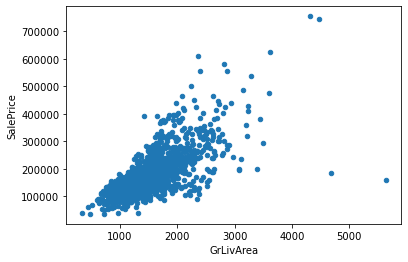

In [18]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1);
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0.9));

There is an obvious linear relation between SalePrice and GrLivArea. Let's take a look at TotalBsmtSF.

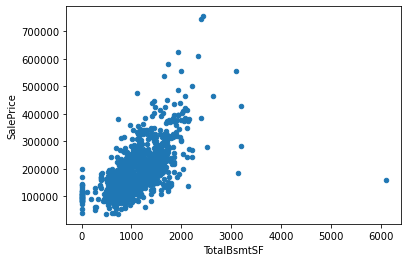

In [19]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1);
data.plot.scatter(x=var, y='SalePrice', ylim=(0.9));

First, we notice that eventhough there is a clear relation between TotalBsmtSF and SalePrice, it is not so obvisous that it is a linear realation. Indeed, SalePrice value's increase rate seems to not be consistent with that of TotalBsmtSF which sends us clues that it may be an exponential relationship. 
Also, there are many points with a TotalBsmtSF value of 0.

Now, the three other selected variables, namely OverallQual, YearBuilt, and Neighborhood, are categorical variables. We proceed using boxplot to analyze the influence these variables have on SalePrice. We start with YearBuilt.

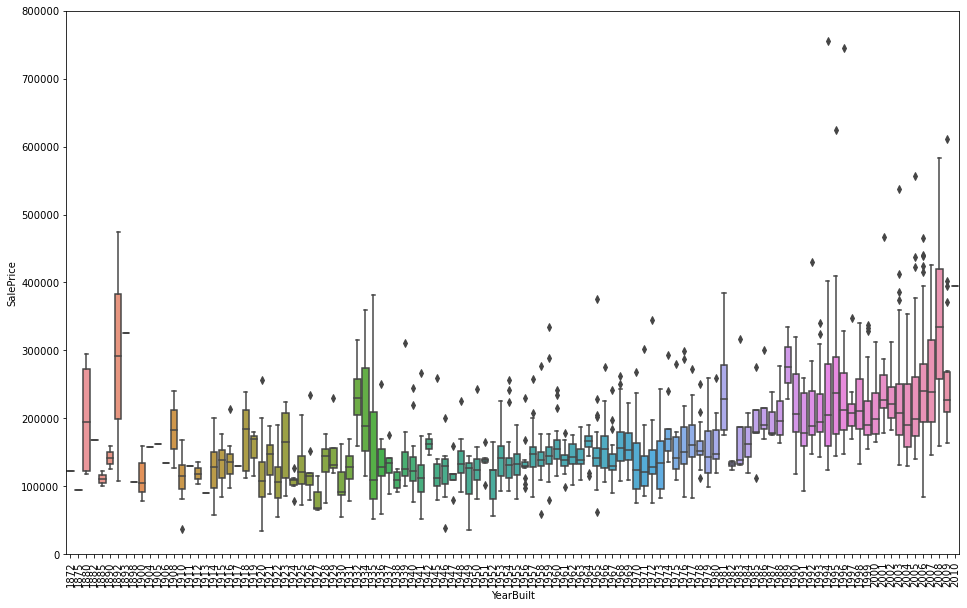

In [20]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1);
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y='SalePrice', data=data);
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

We see that there is no clear strong relationship between YearBuilt and SalePrice. However, we can see a general tendency with SalePrice going up with more recent houses. We also do not know if the provided SalePrice takes into account inflation. However, it is reasonable to guess that SalePrice does indeed take into account inflation because if it was not the case, we can assume that the increase rate of SalePrice throughout the years would be greater.

Now let's tkae a look at Neighborhood.

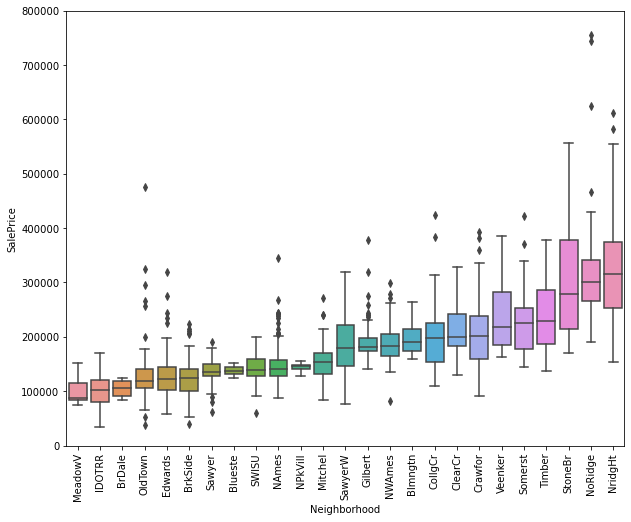

In [94]:
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1);
f, ax = plt.subplots(figsize=(10, 8))
order = data.groupby([var])['SalePrice'].median().sort_values().iloc[::1].index;
fig=sns.boxplot(x=var, y='SalePrice', data=data, order=order);
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

We notice that the neighborhoods with the lowest median tend to have more grouped SalePrice values with more evenly distributed quartile contrary to Neighborhoods with higher medians that have very spread SalePrice values. We also notice that the for most Neighborhoods, the upper quartile has more dispersed values than the lower quartile. 

Now we take a look at OverallQual.

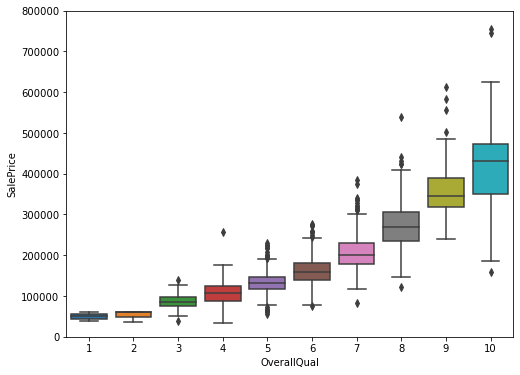

In [122]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

As expected, there is a linear relationship between OverallQual and SalePrice. It is intuitive that the better the quality of the real estate, the higher the sale price.

#### Summary of findings on selected variables' influence on independant variable SalePrice.

- GrLivArea has a clear positive linear relationship with SalePrice.
- TotalBsmtSF also has a positive linear relationship with SalePrice. However, the slope is particularly high and it can be argued that the relationship resembles an exponential relationship.
- OverallQual is the the categorical variable that has the strongest linear relationship with SalePrice.
- YearBuilt has a weaker linear relationship with SalePrice than OverallQual. However, there is still a clear trend of SalePrice to increase as YrBuilt goes up.
- Finally, for Neighborhood, even though we can clearly see that some neighborhoods imply a higher median SalePrice, the interquartile range generally increases significantly for neighborhoods with higher median SalePrice. It is therefore harder to confidently state that there is indeed a strong relationship between SalePrice and Neighborhood. 


Now that we are done analyzing the five variables that we considered more important, we can start analyzing the other variables.

### Objective Analysis

Since the beginning of this project, we focused on our instancts and subjectively chose the variables that we considered may have a stronger relationship with the independant variable. Next, we will analyze the variables with a more objective and structured thought process.

We use a heatmap to have a general view of all the possible correlations between the variables.

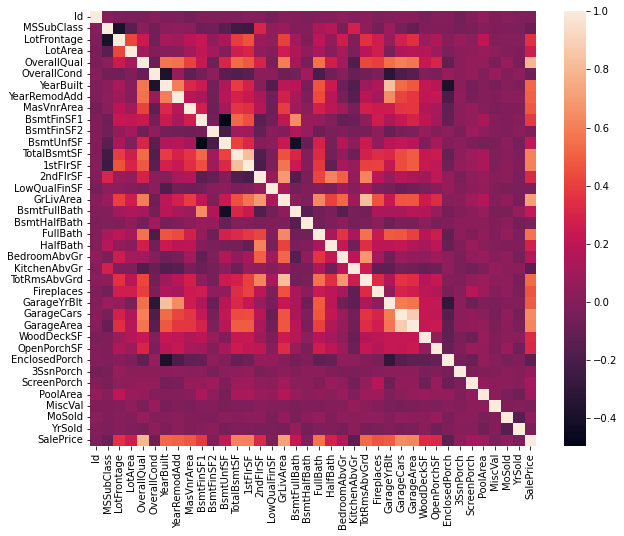

In [106]:
corr_matrix = df_train.corr()
f, ax = plt.subplots(figsize=(10, 8));
sns.heatmap(corr_matrix);

First, we notice the SalePrice correlations. As we already know, OverallQual and GrLivArea have a relatively strong correlation with SalePrice. However, we notice other variables strongly related with SalePrice. 

Among other variables, we notice relation between TotalBsmtSF and 1stFlrSF. We also notice an intuitive relation between all variables that imply the yer of construction. Same with variables involving the garage. These variables almost give the same information. 

Again, we will use a heatmap to view what variables SalePrice has the highest correlation coefficient with.

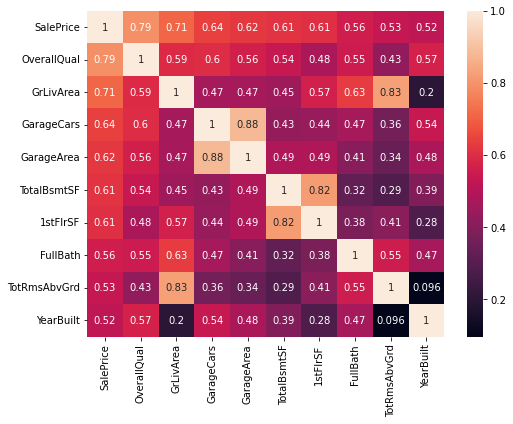

In [143]:
cols = corr_matrix.nlargest(10, 'SalePrice').index
best_var = df_train[cols].corr();
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(best_var, annot=True);

In this heatmap, we see the top 10 variables that have the highest correlation coefficient with SalePrice. Again, as expected, we find OverallQual, GrLivArea, TotalBsmtSF, and YearBuilt. GarageCars and GarageArea also have a high correlation coefficient with SalePrice.

GarageCars and GarageArea are strongly related. It is intuitive since the greater the garage area, the more cars we can fit in. Given the high correlation and the nature of the variables, we can conclude that both variables give the same information. 

Same with 1stFlrSF and GrLivArea, and TotRmsAbvGrd and GrLivArea. It is however surprising to see that SalePrice has a greater correlation coefficient with FullBath than with TotRmsAbvGrd.

In order to have a better idea of how those correlations look like, we will draw scatter plots to display each of them. We will leave out GarageArea, 1stFlrSF, and TotRmsAbvGrd since we consider that the impact of those variables can be emcompassed by others, namelly GarageCars for GarageArea and GrLivArea for 1stFlrSF, and TotRmsAbvGrd.

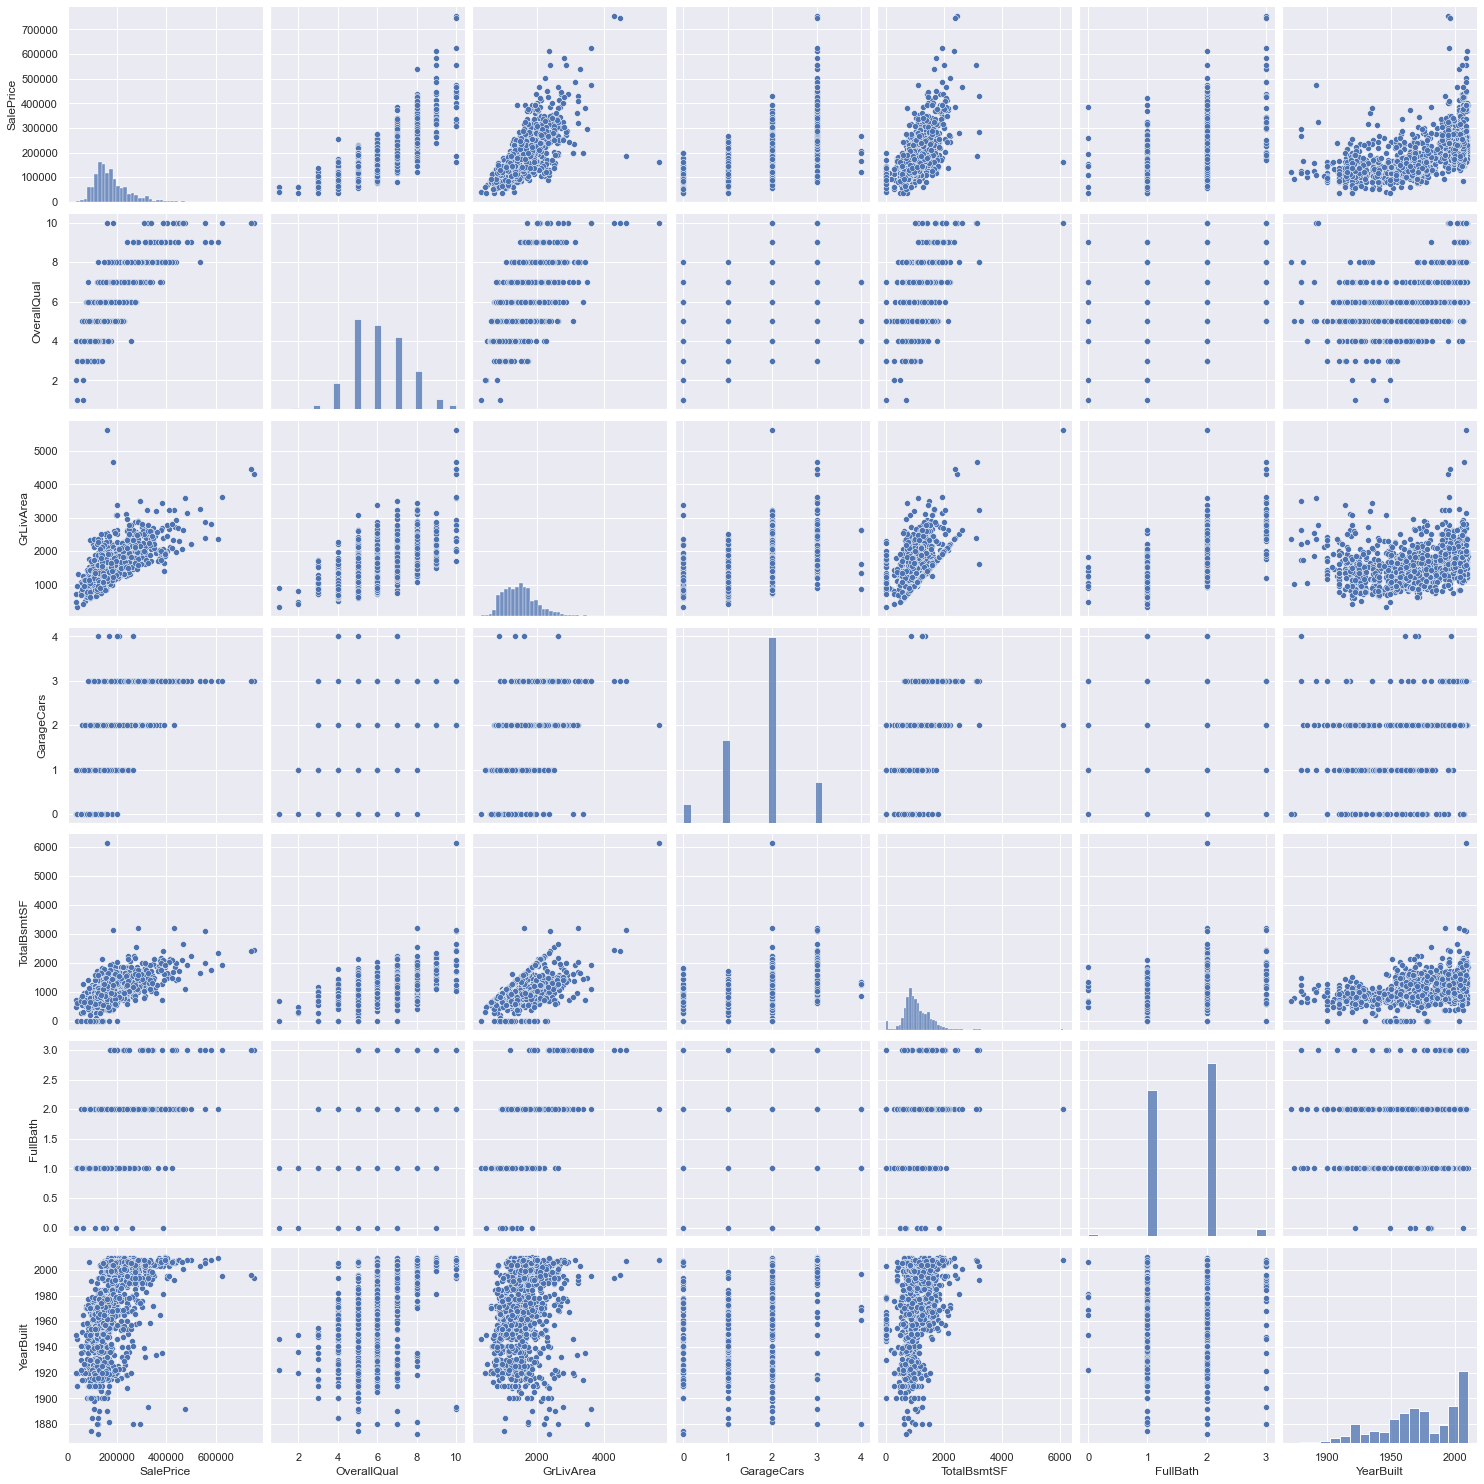

In [145]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 3)
plt.show();

### Dealing with missing data

We want to take a look at the missing data in our data set. Just as it is important to analyze our data, it is important to analyze the missing data as it can also hide useful information.

We first want to verify if it is possible to see a pattern in the missing data. We will get the percentage of missing data per variable. 

In [170]:
missing = df_train.isnull().sum();
percent = df_train.isnull().sum() / df_train.isnull().count();
missing_df = pd.concat([missing, percent], axis=1, keys=['Missing', 'Percent'])
missing_df.sort_values(by='Percent', inplace=True, ascending=False);
missing_df.head(20)

,Missing,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
